# Challenge #4

This notebook contains the results of the Smarthelio challenge #4.

    1 Does the data represents a degradation factor of 6.7%?

For more details in regards this results, please contact the author of this notebook.

NOTE: all the results here contained, are for the to be used exclusively for the Smarthelio challenge.

## 1 Methods addopted

### Imports:

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
import sys
from os.path import join
%matplotlib inline

In [2]:
# define raw data file
file = join(r"D:\repo\smarthelio\challenge\data\Challenge4.xlsx")
# define code path
sys.path.append(r"D:\repo\smarthelio\challenge\notebooks\code")

In [3]:
# import challenge 1 functions
import calcs

## Important:

__Note that one year of data is normally not enugh to generate a degradation study. We shold make sure that the data available is representative of the overall PV system data. It may be that the data presented, represents data of an extraordinary year with uncommon conditions. The methods suggested in the following part are methods that offer more efficient solutions with more years of data.__

### Read raw data and create DF

In [4]:
# Weather data
weather_df = pd.read_excel(file, sheet_name="Weather Data")
weather_df = weather_df.rename(columns={"Ambient Temperature": "Tamb"})
weather_df = weather_df.set_index(pd.DatetimeIndex(weather_df.DateTime)).drop("DateTime",
                                                                   axis=1)
weather_df.head()

,Irradiance,Tamb,PV Module Temperature,Wind Speed
DateTime,,,,
2019-11-01 00:00:00,0.0,11.923875,NaN,0.671767
2019-11-01 00:15:00,0.0,11.240499,NaN,0.571344
2019-11-01 00:30:00,0.0,10.714922,NaN,0.543904
2019-11-01 00:45:00,0.0,10.347939,NaN,0.670937
2019-11-01 01:00:00,0.0,10.036125,NaN,0.940000


In [5]:
# Inverter Data
inverter_df = pd.read_excel(file, sheet_name="Inverter Data")
inverter_df = inverter_df.rename(columns={" Time": "DateTime", "MPPT1 - Current DC (A)":"MPPT1_A",
                                         "MPPT2 - Current DC (A)":"MPPT2_A","MPPT1 - Voltage DC (V)":"MPPT1_V",
                                         "MPPT2 - Voltage DC (V)":"MPPT2_V"})
inverter_df = inverter_df.set_index(pd.DatetimeIndex(inverter_df.DateTime)).drop("DateTime", axis=1)
inverter_df.head()

,MPPT1_A,MPPT2_A,MPPT1_V,MPPT2_V
DateTime,,,,
2019-11-01 00:00:00,NaN,NaN,NaN,NaN
2019-11-01 00:15:00,NaN,NaN,NaN,NaN
2019-11-01 00:30:00,NaN,NaN,NaN,NaN
2019-11-01 00:45:00,NaN,NaN,NaN,NaN
2019-11-01 01:00:00,NaN,NaN,NaN,NaN


In [6]:
# Joining the 2 DataFrames
df = pd.concat([weather_df, inverter_df], axis=1)
df.head()

,Irradiance,Tamb,PV Module Temperature,Wind Speed,MPPT1_A,MPPT2_A,MPPT1_V,MPPT2_V
DateTime,,,,,,,,
2019-11-01 00:00:00,0.0,11.923875,NaN,0.671767,NaN,NaN,NaN,NaN
2019-11-01 00:15:00,0.0,11.240499,NaN,0.571344,NaN,NaN,NaN,NaN
2019-11-01 00:30:00,0.0,10.714922,NaN,0.543904,NaN,NaN,NaN,NaN
2019-11-01 00:45:00,0.0,10.347939,NaN,0.670937,NaN,NaN,NaN,NaN
2019-11-01 01:00:00,0.0,10.036125,NaN,0.940000,NaN,NaN,NaN,NaN


### Posible solutions

According to Kiefer _et_. _al_., in "__A DEGRADATION ANALYSIS OF PV POWER PLANTS__". It is possible to approach to the real degradation by filtering conditions in the field closed to the STC (1000 W/m$^2$ and 25 C), this helps also to avoid the shadowing effects due to the high sun elevation angle. One knows the reponse of the modules under those conditions and can compare between the ideal and the real case. I am going to present 2 solutions, 
    
    1 Based on Power output (with the intention of demostrating that this is NOT the best solution)
    2 Based on PR (as the paper suggested).
    
That means that:

## Solution #1
__NOT optimum__

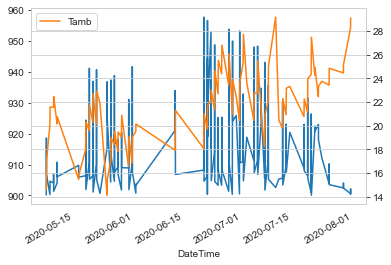

In [51]:
# The first assumption we have to do, is to assume that the irradiance is actually irradiance in the POA
# filtering irradiance (the efficiency of most of Si modules is considered constant at irradiances 
# between 900 W/m^2 and 1000 W/m^2)
df_f = df.loc[(df.Irradiance >= 900) & (df.Irradiance <= 1000)]
df_f.Irradiance.plot()
df_f.Tamb.plot(secondary_y=True)
plt.legend()

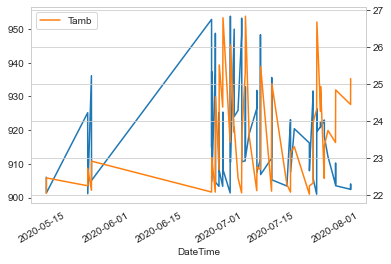

In [52]:
# filtering ambient temperature (we know that wind speed can influence the final module temerature,
# therefore, we can filter from 22 to 27 degrees Celsius)
df_f = df_f.loc[(df_f.Tamb >= 22) & (df_f.Tamb <= 27)]
df_f.Irradiance.plot()
df_f.Tamb.plot(secondary_y=True)
plt.legend()

We can calculate the ideal PV system power output according to the specifications given on the .xls file:

In [53]:
# PV module specifications (points @ STC):
impp = 7.96
vmpp = 30.8
# Inverter 1
n_modules = 51
n_string = 3
mod_x_str = 17
string_v = mod_x_str * vmpp  # series the voltage is added and the current remain the same for the overal string
string_a = n_string * impp  # in a parallel conection the current is added and voltage remains the same
Pout1 = (string_a * string_v) * .98  # considering 1% cabling losses DC and 1% AC 
# Inverter 2
n_modules2 = 42
n_string2 = 2
mod_x_str2 = 21
string_v2 = mod_x_str2 * vmpp  # series the voltage is added and the current remain the same for the overal string
string_a2 = n_string2 * impp  # in a parallel conection the current is added and voltage remains the same
Pout2 = (string_a2 * string_v2) * .98  # considering 1% cabling losses DC and 1% AC 

print("the ideal power output DC @ STC from MPP1 is %.2f W" % Pout1)
print("the ideal power output DC @ STC from MPP2 is %.2f W" % Pout2)

the ideal power output DC @ STC from MPP1 is 12253.50 W
the ideal power output DC @ STC from MPP2 is 10091.11 W


Next, one can calculate the output power of both inverters, compare it with the ideal case and average the difference. After that, a percentage of the difference can be calculated based on the ideal DC power output @ STC:

Text(0, 0.5, 'Power [W]')

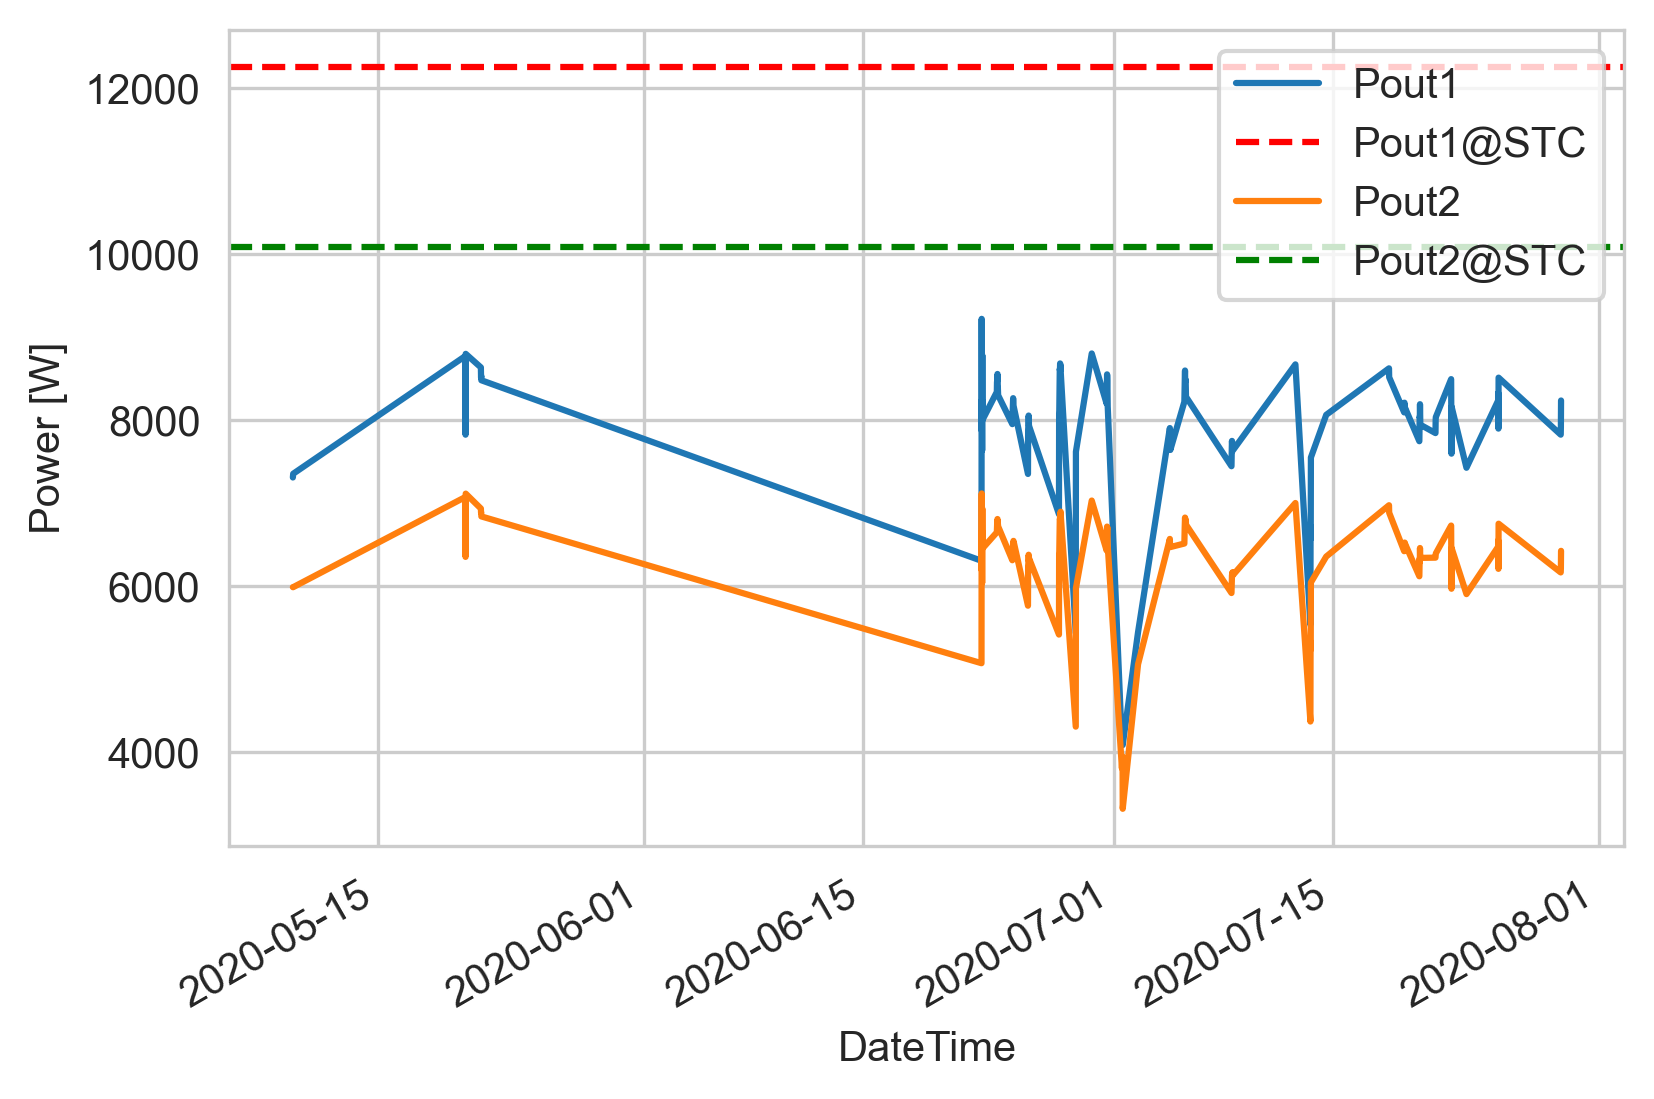

In [54]:
# Get the power of each inverter
df_f["Pout1"] = df_f.MPPT1_A * df_f.MPPT1_V
df_f["Pout2"] = df_f.MPPT2_A * df_f.MPPT2_V
fig, axes = plt.subplots(dpi=300)
df_f.Pout1.plot()
axes.axhline(y=Pout1, color='r', linestyle='--', label="Pout1@STC")
df_f.Pout2.plot()
axes.axhline(y=Pout2, color='g', linestyle='--', label="Pout2@STC")
plt.legend(loc="uper center")
axes.set_ylabel("Power [W]")

From here, we can get the diference for each point between the ideal case (at STC) and the real case (measured).

Text(0, 0.5, 'Power [W]')

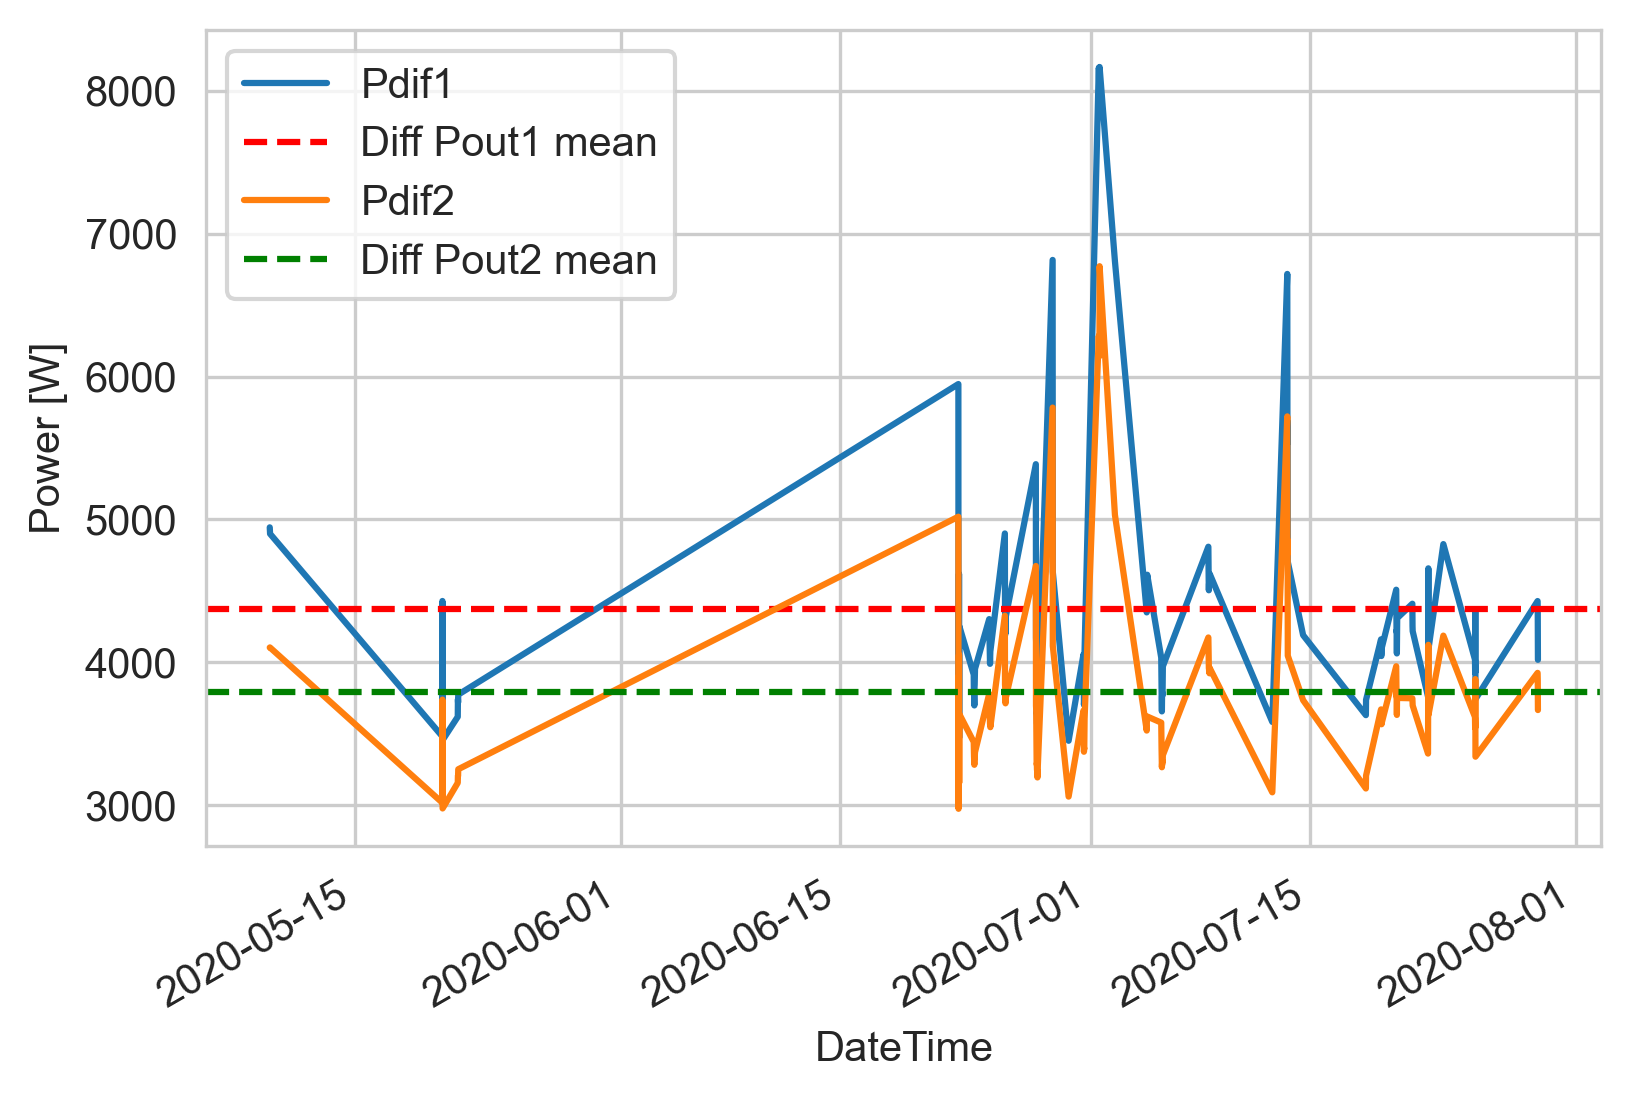

In [78]:
# Get the difference
df_f["Pdif1"] = Pout1 - df_f.Pout1
df_f["Pdif2"] = Pout2 - df_f.Pout2
# in %
df_f["Pdif1_per"] = (df_f.Pdif1 / Pout1) * 100
df_f["Pdif2_per"] = (df_f.Pdif2 / Pout2) * 100

fig, axes = plt.subplots(dpi=300)
df_f.Pdif1.plot()
axes.axhline(y=df_f.Pdif1.mean(), color='r', linestyle='--', label="Diff Pout1 mean")
df_f.Pdif2.plot()
axes.axhline(y=df_f.Pdif2.mean(), color='g', linestyle='--', label="Diff Pout2 mean")
plt.legend(loc="uper center")
axes.set_ylabel("Power [W]")

In [79]:
# In general we can conclude from here:
print("The mean Power loss in the inverter #1 is %.2f"% df_f.Pdif1_per.mean() +" %")
print("The mean Power loss in the inverter #2 is %.2f"% df_f.Pdif2_per.mean() +" %")
print("In general, we can assume that our system is underperforming in average by %.2f" %((df_f.Pdif1_per.mean()+df_f.Pdif2_per.mean())/2) + "%")

The mean Power loss in the inverter #1 is 35.71 %
The mean Power loss in the inverter #2 is 37.56 %
In general, we can assume that our system is underperforming in average by 36.63%


## Conclusions?

From the data before presented, we cannot conclude that our PV system presents a degradation rate. The Permormance losses can be due to many possible reasons, ie. __missmatch losses, cracks on cells or modules, partial object shading, dust in the modules, etc.__ We are also assuming that on the first year of the installation, the PV system permormed 100% @ STC. Would be interesting to compare this year with years before or after, in order to have an idea of the first operational characteristics that our PV system had.

One can try to simulate the PV system at any given moment, however a more detailed info would be necessary in order to reduce the uncertainty in the final calculations.

Alternatively, one can also check the PR of the system and compare it with the ideal PR @ STC as follows:

## Alternative, solution #2

In [80]:
pnom1 = Pout1  # according to the .xls file
pnom2 = Pout2  # according to the .xls file
temp_coef = -0.45  # according to the .xls file
df_f["PR1"] = calcs.pr(df=df_f, 
                    p_col="Pout1", 
                    irr_col="Irradiance",
                    temp_col="PV Module Temperature",
                    pnom=pnom1,
                    temp_coef=temp_coef)
df_f["PR2"] = calcs.pr(df=df_f, 
                    p_col="Pout2", 
                    irr_col="Irradiance",
                    temp_col="PV Module Temperature",
                    pnom=pnom2,
                    temp_coef=temp_coef)
df_f.head()

,Irradiance,Tamb,PV Module Temperature,Wind Speed,MPPT1_A,MPPT2_A,MPPT1_V,MPPT2_V,Pout1,Pout2,Pdif1,Pdif2,Pdif1_per,Pdif2_per,PR1,PR2
DateTime,,,,,,,,,,,,,,,,
2020-05-09 13:30:00,906.021414,22.047011,78.714641,1.520438,18.390236,12.262744,397.444336,488.324219,7309.095136,5988.194887,4944.401504,4102.919993,40.350943,40.658738,0.868227,0.863747
2020-05-09 13:45:00,905.882582,22.263485,78.841954,1.550997,18.570301,12.366877,395.121368,484.133331,7337.522735,5987.217356,4915.973905,4103.897524,40.118948,40.668425,0.872396,0.864391
2020-05-09 14:00:00,901.345279,22.462591,78.826624,1.584282,18.672401,12.416931,393.858215,482.272003,7354.278528,5988.338184,4899.218112,4102.776696,39.982205,40.657318,0.878710,0.868826
2020-05-20 14:00:00,925.134057,22.250420,67.306065,6.760688,22.011650,14.580384,398.524292,485.178864,8772.177232,7074.094146,3481.319408,3017.020734,28.410824,29.897794,0.955785,0.935932
2020-05-20 14:15:00,914.616773,22.510051,67.105237,6.773850,19.305044,12.831307,405.311890,495.088989,7824.563870,6352.638810,4428.932770,3738.476070,36.144236,37.047206,0.861378,0.849197


### Check plot

Text(0, 0.5, 'PR')

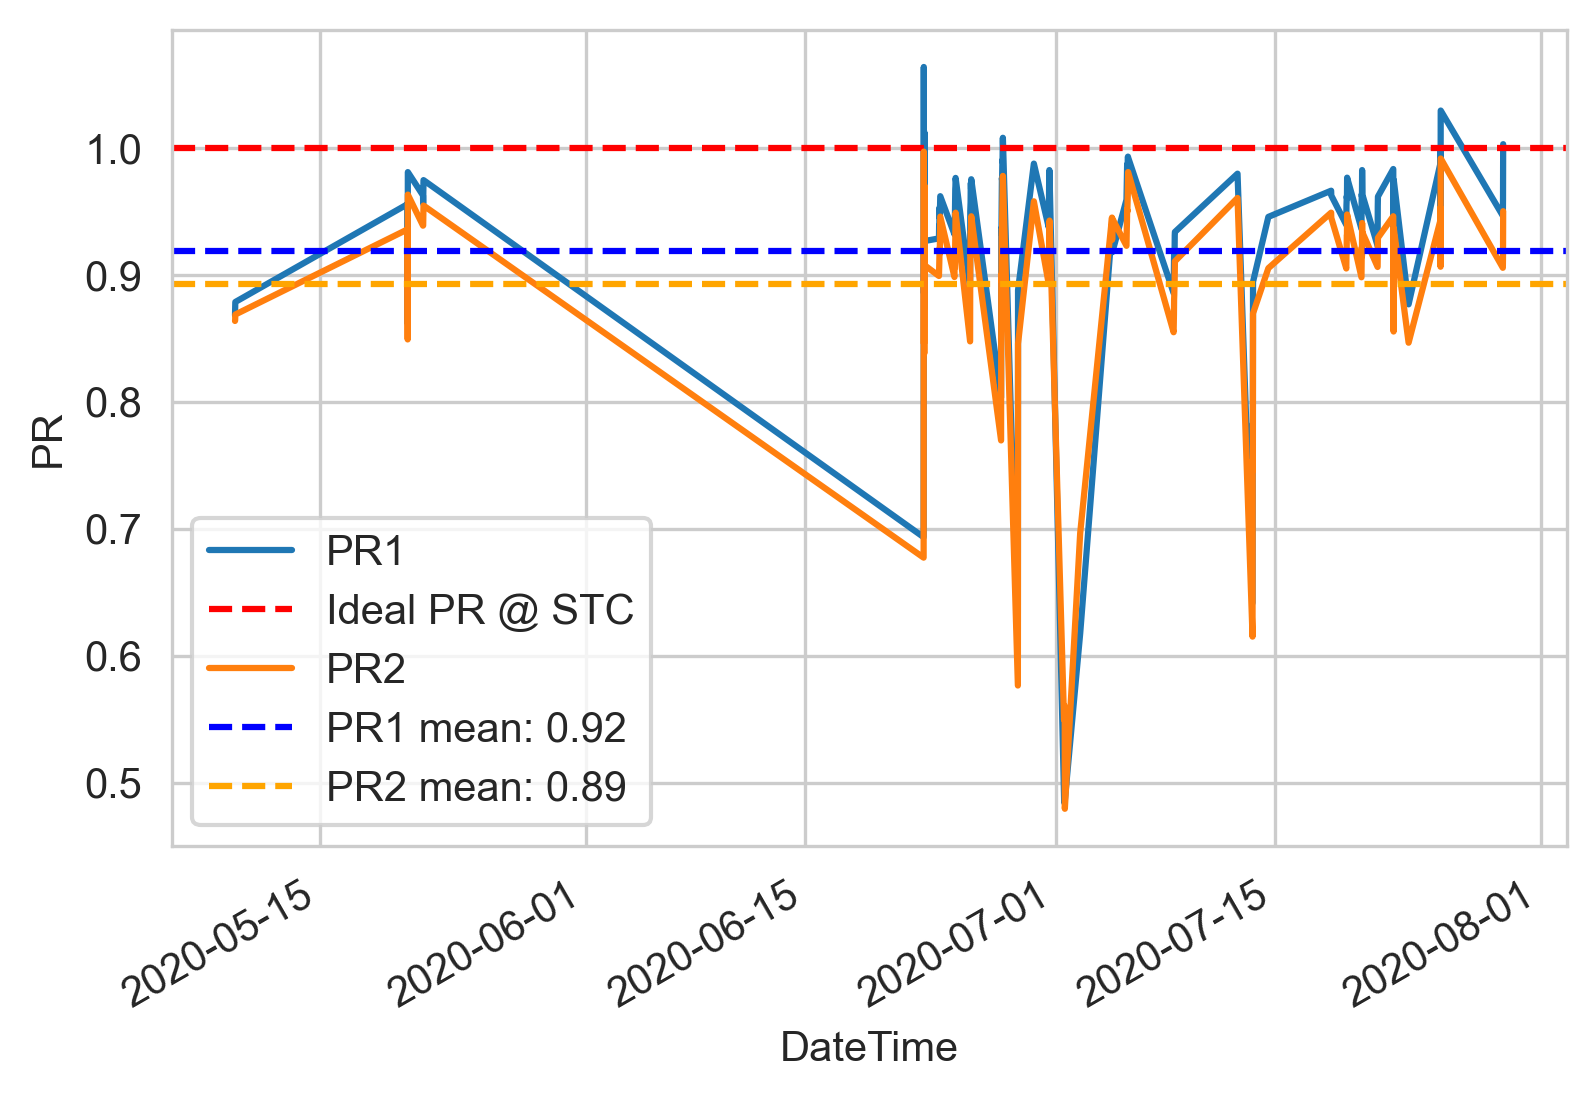

In [83]:
fig, axes = plt.subplots(dpi=300)
df_f.PR1.plot()
axes.axhline(y=1, color='r', linestyle='--', label="Ideal PR @ STC")
df_f.PR2.plot()
axes.axhline(y=df_f.PR1.mean(), color='blue', linestyle='--', label="PR1 mean: %.2f" %df_f.PR1.mean())
axes.axhline(y=df_f.PR2.mean(), color='orange', linestyle='--', label="PR2 mean: %.2f" %df_f.PR2.mean())
plt.legend(loc="uper center")
axes.set_ylabel("PR")

## Personal conclusions:

In my personal poiunt of view, it is better to based the analysis on PR. From the plot above, one can observe that PR is a better index for the degradation and we can conclude that:

In [86]:
print("Mean PR from inverter 1 is %.2f" % df_f.PR1.mean())
print("Mean PR from inverter 2 is %.2f" % df_f.PR2.mean())
print("Mean PR from the PV system is %.2f" % ((df_f.PR1.mean()+df_f.PR2.mean())/2))

Mean PR from inverter 1 is 0.92
Mean PR from inverter 2 is 0.89
Mean PR from the PV system is 0.91


From here, we can attribute some part of it to degradation however we cannot conclude that the PV system is underperforing 9% due to degradation entirely. There are some performance loss factors that one has to take into consideration as well (mentioned above).